# <font color='red'>Backpropagation</font>

## <font color='red'>Loading data </font>

In [116]:
# mount drive to access files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# import necessary libraries 
# load data

import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('/content/drive/MyDrive/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [118]:
print(data[:2])

[[-1.2879095  -0.12001342 -1.45900038 -0.66660821 -0.14421743  1.85884913]
 [-0.59338101  0.36716642 -0.30309415 -0.98732948 -0.74026221  1.81901037]]


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'> Implementing Forward propagation, Backpropagation

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [120]:
# create function for sigmoid function
import math
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    # write the code to compute the sigmoid value of z and return that value 

    out = (1/(1+math.exp(-z)))
    return out

In [123]:
# write a function for forward propagation

import math
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # we are computing one of the values for better understanding
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = math.exp(val_1)

        val_2 = part_1 + w[6]
        part_2 = math.tanh(val_2)

        val_3 = (math.sin(w[2]*x[2]) * (w[3]*x[3]+w[4]*x[4]))+w[7]
        part_3 = sigmoid(val_3)

        out = (w[8]*part_3)+part_2

        loss = math.pow((y - out),2)

        pred = -2*(y - out)
        
        
        # after computing part1,part2 and part3 compute the value of y' from the main Computational graph using required equations
        # write code to compute the value of L=(y-y')^2 and store it in variable loss
        # compute derivative of L  w.r.to y' and store it in dy_pred 
        # Create a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        forward_dict={}
        forward_dict['exp']= part_1
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = loss
        forward_dict['dy_pred'] = pred
        
        return forward_dict

## <font color='blue'>Backward propagation</font>

In [125]:
# write a function for backward propagation

def backward_propagation(x, y, w, forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9



    dw1 = forward_dict['dy_pred'] * (1-(forward_dict['tanh'])**2) * forward_dict['exp']  *2 * (w[0]*x[0]+w[1]*x[1]) * x[0]
    dw2 = forward_dict['dy_pred'] * (1-(forward_dict['tanh'])**2) * forward_dict['exp']  * 2 * (w[0]*x[0]+w[1]*x[1]) * x[1]
    dw3 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid']*(1-forward_dict['sigmoid']) * (w[3]*x[3]+w[4]*x[4]) * math.cos(w[2]*x[2]) * x[2]
    dw4 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid']*(1-forward_dict['sigmoid']) * math.sin(w[2]*x[2]) * x[3]
    dw5 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid']*(1-forward_dict['sigmoid']) * math.sin(w[2]*x[2]) * x[4]
    dw6 = forward_dict['dy_pred'] * (1-(forward_dict['tanh'])**2) * forward_dict['exp']
    dw7 = forward_dict['dy_pred'] * (1-(forward_dict['tanh'])**2)   
    dw8 = forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid']*(1-forward_dict['sigmoid'])
    dw9 = forward_dict['dy_pred'] *  forward_dict['sigmoid']
    
   
    backward_dict={}
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9

    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    
    
    return backward_dict

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking 

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>


In [127]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # make sure that the order is correct i.e. first element in the list corresponds to  dw1 ,second element is dw2 etc.
    # you can use reverse function if the values are in reverse order
    
    approx_gradients_list=[]
    #now we have to write code for approx gradients, here you have to make sure that you update only one weight at a time
    #write your code here and append the approximate gradient value for each weight in  approx_gradients_list
    for i in range(len(w)):
      w_0 = w[i]
      w[i] = w[i] + eps
      forward_dict1 = forward_propagation(x,y,w)
      loss1 = forward_dict1['loss']
      w[i] = w[i] - (2 * eps)
      forward_dict2 = forward_propagation(x,y,w)
      loss2 = forward_dict2['loss']
      w[i] = w_0 

      app_grad = (loss1 - loss2)/(2*eps)
      approx_gradients_list.append(app_grad)


    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value
    

#  Optimizers </font>

**Check below video for reference purpose**

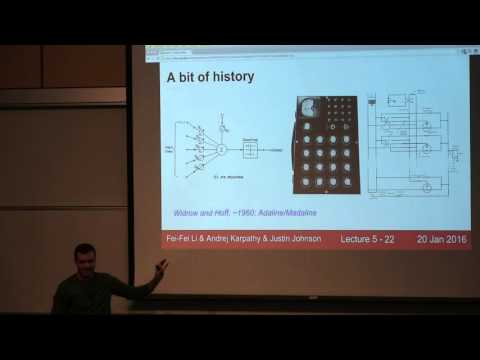

In [129]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [130]:
vanilla_loss = []
learnig_rate = 0.001

for epoch in range(20):  # for loop for each epoch

  loss_vanilla = 0
  for point,label in zip(X,y):

    forward_dict = forward_propagation(point, label, w)  # performing forward propagation
    backward_dict = backward_propagation(point, label, w,forward_dict)  # performing backward propagation
    gradients = np.array(list(backward_dict.values()))  # finding gradients
    loss_vanilla = loss_vanilla + forward_dict['loss']  # finding loss

    w = w - (learnig_rate* gradients.T)  # vanilla update

  avg_loss_vanilla = loss_vanilla/len(X)
  vanilla_loss.append(avg_loss_vanilla)

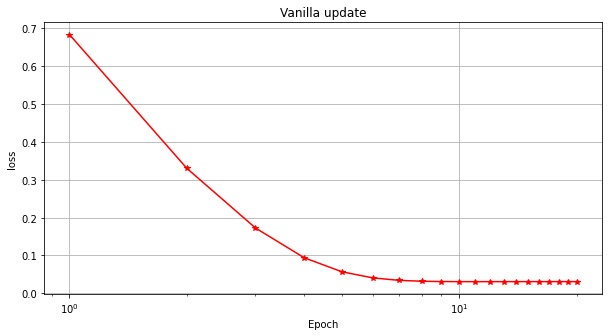

In [131]:
# plotting loss
epochs = list(range(1,21))
plt.figure(figsize = (10,5))
plt.plot(epochs,vanilla_loss,'r-*')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xscale('log')
plt.title('Vanilla update')
plt.grid()
plt.show()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [132]:
w = np.random.normal(loc= 0.0, scale = 0.01 , size = 9)  # initialize weight using normal dist

eta = 0.01
gamma = 0.9
momentum_loss = []
v_old = 0

for epoch in range(20):  # for loop for each epoch

  loss = 0
  for point,label in zip(X,y):

    forward_dict = forward_propagation(point, label, w)  # performing forward propagation
    backward_dict = backward_propagation(point, label, w,forward_dict)  # performing backward propagation
    gradients = np.array(list(backward_dict.values()))  # finding gradients
    loss = loss + forward_dict['loss']  # finding loss
    v_old = (gamma * v_old) + ((eta) * gradients.T)  

    w = w - v_old   # momentum update

  avg_loss = loss/len(X)
  momentum_loss.append(avg_loss)


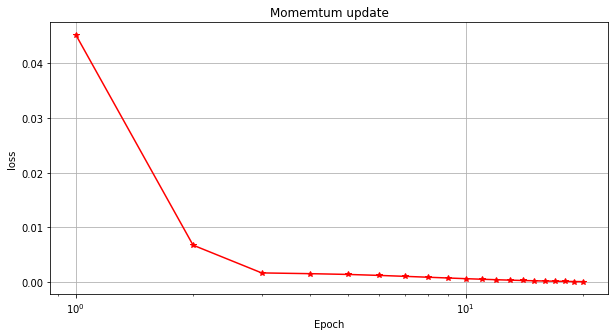

In [133]:
# plotting loss
epochs = list(range(1,21))
plt.figure(figsize = (10,5))
plt.plot(epochs,momentum_loss,'r-*')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xscale('log')
plt.title('Momemtum update')
plt.grid()
plt.show()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [134]:
w = np.random.normal(loc= 0.0, scale = 0.01 , size = 9)  # initialize weight using normal dist

m = 0
v = 0
t = 0
B1 = 0.9
B2 = 0.99
alpha = 0.001
eps = 0.001

adam_loss = []


for epoch in range(20):  # for loop for each epoch

  loss_adam = 0
  t = t+1
  for point,label in zip(X,y):

    forward_dict = forward_propagation(point, label, w)  # performing forward propagation
    backward_dict = backward_propagation(point, label, w,forward_dict)  # performing backward propagation
    gradients = np.array(list(backward_dict.values()))  # finding gradients
    loss_adam = loss_adam + forward_dict['loss']  # finding loss
    m = (B1 * m) + ((1-B1)* gradients.T)
    v = (B2 * v) + ((1-B2)* ((gradients.T)**2))
    m_ = (m / (1-(B1**t)))
    v_ = (v / (1-(B2**t)))

    w = w - (alpha * m_ / (np.sqrt(v_) + eps))  # adam update

  avg_loss_adam = loss_adam/len(X)
  adam_loss.append(avg_loss_adam)


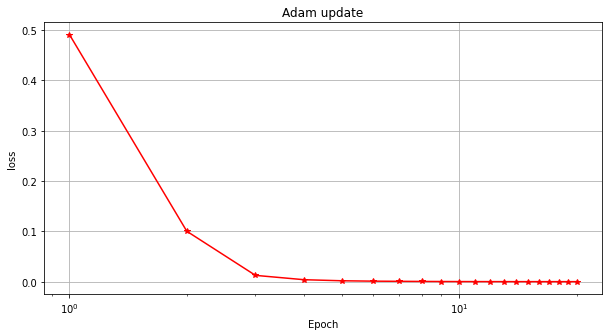

In [135]:
# plotting loss
epochs = list(range(1,21))
plt.figure(figsize = (10,5))
plt.plot(epochs,adam_loss,'r-*')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.xscale('log')
plt.title('Adam update')
plt.grid()
plt.show()